# **Loading data**

In [1]:
from google.colab import files

uploadedFiles = files.upload()

Saving comment.xlsx to comment.xlsx
Saving stopWords.txt to stopWords.txt


In [2]:
from io import StringIO
import pandas as pd

In [3]:
def decode(fileName):
  return StringIO(uploadedFiles[fileName + '.txt'].decode("utf-8"))

In [4]:
def read(fileName, fileType):
  if fileType == 'excel':
    return pd.read_excel(uploadedFiles[fileName + '.xlsx'], header = 0)
  return decode(fileName).read()

In [5]:
def get_input(name):
  return input("please enter " + name + " file name:  ")

In [6]:
comments = read(get_input('comment'), 'excel')

please enter comment file name:  comment


In [7]:
stopwords = read(get_input('stop word'), 'text')

please enter stop word file name:  stopWords


# **after loaded**

In [1]:
import pandas as pd

In [2]:
with open('stopWords.txt') as f:
    stopwords = f.read()

In [3]:
comments = pd.read_excel('comment.xlsx', header = 0)

# **Exploring data**

In [4]:
import seaborn as sns

In [5]:
comments.head()

,product_id,confirmed_at,comment
0,90213,2018-08-23 11:05:47,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...
1,56871,2018-08-23 10:21:53,بوی تند ولی خوشبو داره.ماندگاریش خوبه و هر چقد...
2,49738,2018-10-13 11:13:39,متاسفانه عمر مفید این ماشین کم هست و بعد از دو...
3,134367,2018-10-17 11:27:57,افا از وقتی من اینو واسه پسرم خریدم همه بچه ها...
4,151402,2018-08-23 10:28:47,این تیغ محصول کشور آمریکا هست ( در عکس محصول م...


**pie chart of product id**

<Axes: ylabel='product_id'>

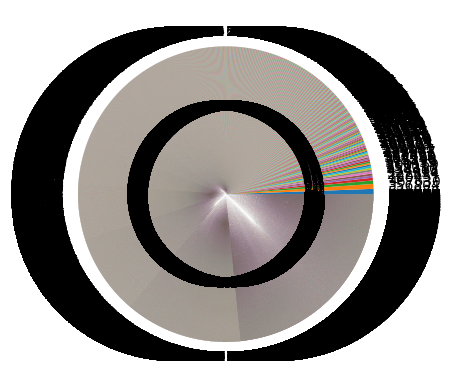

In [6]:
comments.product_id.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [7]:
def add_comments_count(ids, comments):
  comments_on_a_product = comments[ids.isin(ids[ids.duplicated()])].sort_values('product_id')

  comments_count  = pd.Series(comments_on_a_product['product_id'].value_counts(), name='comment_count')

  return comments_on_a_product.merge(comments_count, left_index=True, right_index=True).sort_values('product_id').reset_index(drop=True)

In [8]:
ids = comments["product_id"]

products_comments = add_comments_count(ids, comments)

products_comments

,product_id,confirmed_at,comment,comment_count
0,300,2018-05-26 09:53:29,واقعا عالی من دو سال تمام ازش استفاده کردم عالی,2
1,5289,2018-04-08 12:14:35,مناسفانه در طول روز مدام اینترنت قطع میشه و چر...,3
2,5398,2018-05-25 15:26:20,دوستان من این موس خریدم اما وقتی باهاش مواجه ش...,2
3,7793,2018-05-26 15:15:46,بعد از یک هفته یه لنگه ش از کار افتاد \nبدنه و...,3
4,7793,2018-04-17 15:50:42,این هنذفری فابریک گوشیم j5 بود واقعا خیلی بده ...,2
...,...,...,...,...
1229,658860,2018-07-03 09:22:48,در کل بد نیست اما گرونه مگه تو شگفت انگیز.\nمن...,5
1230,661003,2018-06-30 13:33:20,با سلام و خسته نباشید\nمن این مچ بند رو خریدار...,27
1231,666198,2018-07-03 09:52:59,کلا از بعضی از نظر ها خوب و بعضی ها متوسط است,4
1232,667675,2018-07-05 11:33:57,طعم بی نظیر شربت .. حتی بهتر از سن ایچ\nطعم ها...,4


<Axes: xlabel='product_id', ylabel='comment_count'>

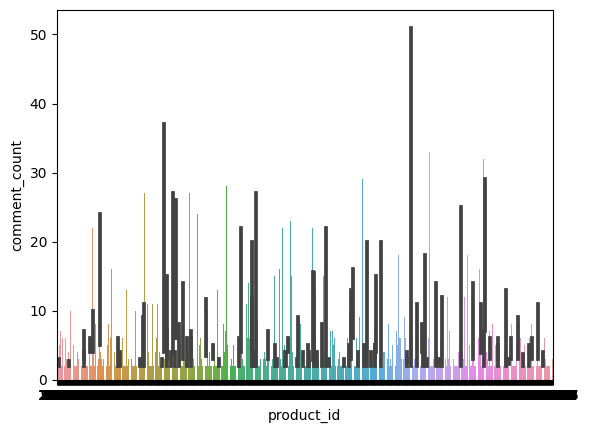

In [9]:
sns.barplot(x='product_id', y='comment_count' , data=products_comments)

# **Preprocessing**

In [19]:
def delete_dup(df, column):
  return df.drop_duplicates(subset=[column], inplace=True)  #dropping duplicates

In [20]:
def delete_nan(df, column):
  return df.dropna(subset=[column], inplace=True)

In [21]:
comments.drop(columns = ['product_id', 'confirmed_at'], inplace = True)

In [22]:
comments

,comment
0,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...
1,بوی تند ولی خوشبو داره.ماندگاریش خوبه و هر چقد...
2,متاسفانه عمر مفید این ماشین کم هست و بعد از دو...
3,افا از وقتی من اینو واسه پسرم خریدم همه بچه ها...
4,این تیغ محصول کشور آمریکا هست ( در عکس محصول م...
...,...
100003,قیمت مناسبی داره در حال حاضر . با این پول سخت ...
100004,در کل راضیم درسته لنوو با قیمت پایین تر هسته و...
100005,من این محصول رو از بیرون تهیه کردم . و باید بگ...
100006,دوسال و.نیم پیش از دیجی کالا گرفتم. هنوز مثل ر...


In [23]:
delete_dup(comments, 'comment')
delete_nan(comments, 'comment')

comments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97777 entries, 0 to 100007
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  97777 non-null  object
dtypes: object(1)
memory usage: 1.5+ MB


In [25]:
import re
from nltk.tokenize import RegexpTokenizer

In [26]:
tokenizer = RegexpTokenizer('\s+', gaps = True)

In [27]:
def tokenize_text(text):
  return tokenizer.tokenize(re.sub("\W", " ", text))

In [28]:
stopwords = tokenize_text(stopwords)

In [29]:
def delete_empty_rows(df):
  return df.drop(df[df.comment == ' '].index, inplace = True)

In [30]:
def delete_stopwords(tokens):
  filtered_tokens = ''

  for word in tokens:
    if word not in stopwords:
      filtered_tokens = filtered_tokens + ' ' + word

  return filtered_tokens

In [31]:
def change_row_val(df, row, newVal):
  return df.replace(row, newVal, inplace = True)

In [32]:
def update_df(df, column):
  for row in df[column]:
    change_row_val(df, str(row), delete_stopwords(tokenize_text(str(row))))

  delete_empty_rows(df)
  return delete_dup(df, column)

In [33]:
update_df(comments, 'comment')

In [34]:
comments

,comment
0,سلام اینکه نظرم رو بگم میخواستم موضوع مهم اشا...
1,بوی تند خوشبو داره ماندگاریش خوبه چقدر میگذره...
2,متاسفانه عمر مفید این ماشین کم سال دیگه باطری...
3,افا وقتی اینو واسه پسرم خریدم بچه های فامیل ع...
4,این تیغ محصول کشور آمریکا عکس محصول مشخص شرکت...
...,...
100003,قیمت مناسبی داره حال حاضر این پول سخت میشه یه...
100004,کل راضیم درسته لنوو قیمت پایین هسته ایسوس جنس...
100005,این محصول رو تهیه کردم باید بگم زیباست مقاومت...
100006,دوسال نیم دیجی کالا گرفتم روز کار میکنه عالیه


# **Vectorizing: TF IDF**

In [35]:
texts = comments['comment']

In [36]:
texts

0          سلام اینکه نظرم رو بگم میخواستم موضوع مهم اشا...
1          بوی تند خوشبو داره ماندگاریش خوبه چقدر میگذره...
2          متاسفانه عمر مفید این ماشین کم سال دیگه باطری...
3          افا وقتی اینو واسه پسرم خریدم بچه های فامیل ع...
4          این تیغ محصول کشور آمریکا عکس محصول مشخص شرکت...
                                ...                        
100003     قیمت مناسبی داره حال حاضر این پول سخت میشه یه...
100004     کل راضیم درسته لنوو قیمت پایین هسته ایسوس جنس...
100005     این محصول رو تهیه کردم باید بگم زیباست مقاومت...
100006        دوسال نیم دیجی کالا گرفتم روز کار میکنه عالیه
100007     این شامپو مشکل خشکی مو پوست سر ضعف ریشه مو قع...
Name: comment, Length: 96942, dtype: object

In [37]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_extraction.text import TfidfVectorizer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import TruncatedSVD

In [38]:
vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=True, sublinear_tf=False)
vectors = vectorizer.fit_transform(texts)

print(vectorizer.get_feature_names_out())
print(vectors.toarray())
print("\nThe shape of the TF-IDF matrix is: ", vectors.shape)

['00' '000' '0000' ... 'ﻧﺪاﺭﻡ' 'ﻫﺴﺖ' 'ﻫﻨﻮﺯ']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

The shape of the TF-IDF matrix is:  (96942, 78270)


In [ ]:
zero_array = np.zeros((vectors.shape[0], vectors.shape[0]))

square_array = np.append(zero_array, np.array(vectors))

In [42]:
square_array.shape

(96943,)

In [39]:
pca = TruncatedSVD(n_components=200)
vectors_reshaped = pca.fit_transform(vectors)

In [40]:
vectors_reshaped.shape

(96942, 200)

# **DBSCAN**

In [ ]:
def dbscan(D, eps, MinPts):
    '''
    Cluster the dataset `D` using the DBSCAN algorithm.

    dbscan takes a dataset `D` (a list of vectors), a threshold distance
    `eps`, and a required number of points `MinPts`.

    It will return a list of cluster labels. The label -1 means noise, and then
    the clusters are numbered starting from 1.
    '''

    # This list will hold the final cluster assignment for each point in D.
    # There are two reserved values:
    #    -1 - Indicates a noise point
    #     0 - Means the point hasn't been considered yet.
    # Initially all labels are 0.
    labels = [0]*len(D)

    # C is the ID of the current cluster.
    C = 0

    # This outer loop is just responsible for picking new seed points--a point
    # from which to grow a new cluster.
    # Once a valid seed point is found, a new cluster is created, and the
    # cluster growth is all handled by the 'expandCluster' routine.

    # For each point P in the Dataset D...
    # ('P' is the index of the datapoint, rather than the datapoint itself.)
    for P in range(0, len(D)):
        # Only points that have not already been claimed can be picked as new
        # seed points.
        # If the point's label is not 0, continue to the next point.
        if not (labels[P] == 0):
           continue

        # Find all of P's neighboring points.
        NeighborPts = region_query(D, P, eps)

        # If the number is below MinPts, this point is noise.
        # This is the only condition under which a point is labeled
        # NOISE--when it's not a valid seed point. A NOISE point may later
        # be picked up by another cluster as a boundary point (this is the only
        # condition under which a cluster label can change--from NOISE to
        # something else).
        if len(NeighborPts) < MinPts:
            labels[P] = -1
        # Otherwise, if there are at least MinPts nearby, use this point as the
        # seed for a new cluster.
        else:
           C += 1
           grow_cluster(D, labels, P, NeighborPts, C, eps, MinPts)

    # All data has been clustered!
    return labels


def grow_cluster(D, labels, P, NeighborPts, C, eps, MinPts):
    '''
    Grow a new cluster with label `C` from the seed point `P`.

    This function searches through the dataset to find all points that belong
    to this new cluster. When this function returns, cluster `C` is complete.

    Parameters:
      `D`      - The dataset (a list of vectors)
      `labels` - List storing the cluster labels for all dataset points
      `P`      - Index of the seed point for this new cluster
      `NeighborPts` - All of the neighbors of `P`
      `C`      - The label for this new cluster.
      `eps`    - Threshold distance
      `MinPts` - Minimum required number of neighbors
    '''

    # Assign the cluster label to the seed point.
    labels[P] = C

    # Look at each neighbor of P (neighbors are referred to as Pn).
    # NeighborPts will be used as a FIFO queue of points to search--that is, it
    # will grow as we discover new branch points for the cluster. The FIFO
    # behavior is accomplished by using a while-loop rather than a for-loop.
    # In NeighborPts, the points are represented by their index in the original
    # dataset.
    i = 0
    while i < len(NeighborPts):

        # Get the next point from the queue.
        Pn = NeighborPts[i]

        # If Pn was labelled NOISE during the seed search, then we
        # know it's not a branch point (it doesn't have enough neighbors), so
        # make it a leaf point of cluster C and move on.
        if labels[Pn] == -1:
           labels[Pn] = C

        # Otherwise, if Pn isn't already claimed, claim it as part of C.
        elif labels[Pn] == 0:
            # Add Pn to cluster C (Assign cluster label C).
            labels[Pn] = C

            # Find all the neighbors of Pn
            PnNeighborPts = region_query(D, Pn, eps)

            # If Pn has at least MinPts neighbors, it's a branch point!
            # Add all of its neighbors to the FIFO queue to be searched.
            if len(PnNeighborPts) >= MinPts:
                NeighborPts = NeighborPts + PnNeighborPts
            # If Pn *doesn't* have enough neighbors, then it's a leaf point.
            # Don't queue up it's neighbors as expansion points.
            #else:
                # Do nothing
                #NeighborPts = NeighborPts

        # Advance to the next point in the FIFO queue.
        i += 1

    # We've finished growing cluster C!


def region_query(D, P, eps):
    '''
    Find all points in dataset `D` within distance `eps` of point `P`.

    This function calculates the distance between a point P and every other
    point in the dataset, and then returns only those points which are within a
    threshold distance `eps`.
    '''
    neighbors = []

    # For each point in the dataset...
    for Pn in range(0, len(D)):

        # If the distance is below the threshold, add it to the neighbors list.
        if np.linalg.norm(D[P] - D[Pn]) < eps:
           neighbors.append(Pn)

    return neighbors

In [ ]:
cluster_labels = dbscan(vectors_reshaped, 20, 5)

KeyboardInterrupt: ignored

# **DBSCAN**

In [ ]:
dbscan = DBSCAN(eps=5, min_samples=10)
dbscan.fit(vectors_reshaped)

In [ ]:
cluster_labels = dbscan.labels_
coords = vectors.toarray()

In [ ]:
no_clusters = len(np.unique(cluster_labels) )
no_noise = np.sum(np.array(cluster_labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

In [ ]:
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', cluster_labels))
plt.scatter(x, y, c=colors, marker="o", picker=True)
plt.show()